# Random Number Generation

Random number generation is a fundamental concept in programming where we create unpredictable values for:
- Simulations
- Games
- Security applications
- Testing

[INSERT DIAGRAM: Random number generator concept showing input parameters and random output]

## Key Concepts

- **RANDOM(a, b)**: Generates a random integer from a to b inclusive
- Each result has equal probability
- Each execution produces potentially different results
- Random numbers enable simulations of real-world events

## Popcorn Hack 1: Real-World Applications

**Question**: Name two real-world applications where random number generation is essential and briefly explain why.

In [1]:
import random

# Generate random integer between a and b inclusive
def random_int(a, b):
    return random.randint(a, b)

# Examples
print(f"Random number between 1-10: {random_int(1, 10)}")
print(f"Random number between 0-1: {random_int(0, 1)}")  # Coin flip
print(f"Random number between 1-6: {random_int(1, 6)}")  # Die roll

Random number between 1-10: 6
Random number between 0-1: 0
Random number between 1-6: 2


## Common Applications

- **Games**: Dice rolls, card shuffling, enemy behavior
- **Simulations**: Weather models, traffic patterns, economic scenarios
- **Security**: Encryption keys, password generation
- **Statistical sampling**: Selecting random subsets of data

In [ ]:
# Simulating a coin flip
def coin_flip():
    # Generate random number: 1 for heads, 2 for tails
    flip = random.randint(1, 2)
    
    if flip == 1:
        return "Heads"
    else:
        return "Tails"

# Test with 10 flips
for i in range(10):
    print(f"Flip {i+1}: {coin_flip()}")

In [ ]:
# Simulating weighted random choices
def color_spinner():
    # Generate random number from 1-8
    spin = random.randint(1, 8)
    
    if spin <= 3:  # 3/8 chance (37.5%)
        return "Green"
    elif spin <= 5:  # 2/8 chance (25%)
        return "Blue"
    elif spin == 6:
        return "Red"
    elif spin == 7:
        return "Orange"
    else:  # spin == 8
        return "Purple"

# Test with 20 spins
results = {}
for i in range(20):
    result = color_spinner()
    results[result] = results.get(result, 0) + 1

print("Results of 20 spins:")
for color, count in results.items():
    print(f"{color}: {count} times ({count/20*100:.1f}%)")

# Popcorn Hack 2: Magic 8-Ball

Task: Complete the magic_8_ball function that:
1. Returns "Yes" roughly 50% of the time
2. Returns "No" roughly 25% of the time
3. Returns "Ask again later" roughly 25% of the time

Hint: Use the RANDOM function we learned about

In [ ]:
import random

def magic_8_ball():
    # TODO: Generate a random number and use it to return one of
    # the three possible answers with the correct probabilities
    # Your code here
    
    pass  # Replace this with your code

# Test your function
for i in range(10):
    print(f"Magic 8-Ball says: {magic_8_ball()}")

# Simulations and Games

## What is a Simulation?

A **simulation** is a program that models the behavior of a real-world process or system over time. 

Simulations allow us to:
- Explore how systems behave without using the actual physical system in a controlled environment.

In games, simulations help model things like:
- Player movement mechanics
- Physics engines (gravity, collisions, velocity)
- Score progression
- AI opponents (decision-making trees)

## Quick Clarification: Simulation ≠ Randomness

Simulations **do not require randomness** to be useful.

Examples of **non-random simulations**:
- Modeling how a car accelerates based on speed and gear
- Simulating a bouncing ball under gravity
- Predicting how many turns it takes to beat a level based on player actions

## Real-World Simulation Examples

- **Weather Forecasting**: Simulating atmospheric conditions using physics-based models.
- **Traffic Flow**: Predicting bottlenecks based on number of cars and signal timing.
- **Game Physics**: Simulating gravity, friction, and collisions for smooth player interaction.
- **Epidemics**: Tracking how a virus spreads based on population and proximity.

## Example: A Traffic Light Simulation

In the code below, we will simulate a **traffic light** that switches from green → yellow → red → green in a loop.

Each light lasts for a fixed number of time steps (no randomness).

In [1]:
# Traffic light simulation (no randomness)

states = ["Green", "Yellow", "Red"]
durations = {"Green": 3, "Yellow": 1, "Red": 2}
timeline = []

# Simulate 10 time steps
time = 0
state = "Green"
counter = 0

while time < 10:
    timeline.append((time, state))
    counter += 1
    if counter == durations[state]:
        counter = 0
        current_index = states.index(state)
        state = states[(current_index + 1) % len(states)]
    time += 1

for t, s in timeline:
    print(f"Time {t}: {s}")

Time 0: Green
Time 1: Green
Time 2: Green
Time 3: Yellow
Time 4: Red
Time 5: Red
Time 6: Green
Time 7: Green
Time 8: Green
Time 9: Yellow


## Popcorn Hack 3

You have 3 minutes to modify the traffic light simulation:

**Change it so that:**
- Green lasts for 5 steps
- Yellow lasts for 2 steps
- Red lasts for 4 steps

Then run it for 20 time steps and print the results.

Then answer in 2-3 sentences: How is this a simulation? What is it's real world impact?

## Visual Simulation: Bouncing Ball (No Randomness)

This simulation shows how a ball falls due to gravity and bounces off the floor. Each bounce loses a bit of energy, reducing the height of the next bounce.

We simulate the system using rules of physics (position, velocity, gravity).

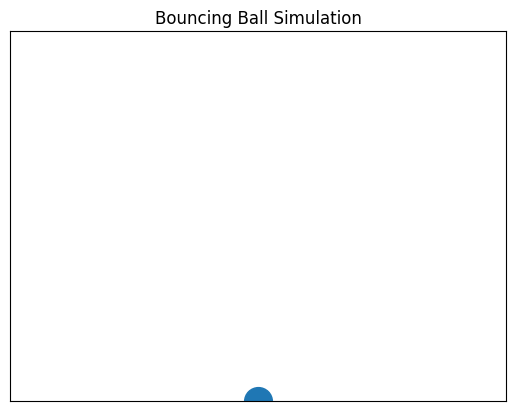

In [8]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Simulation parameters
gravity = -9.8      # acceleration due to gravity (m/s²)
time_step = 0.05    # time step per frame (s)
restitution = 0.75  # bounce energy loss factor

# Initial state
y = 10             # initial height (meters)
v = 0              # initial velocity

def update_physics(y, v):
    v += gravity * time_step
    y += v * time_step
    if y <= 0:
        y = 0
        v = -v * restitution
    return y, v

fig, ax = plt.subplots()
ball, = plt.plot([], [], 'o', markersize=20)
ax.set_xlim(0, 1)
ax.set_ylim(0, 12)
ax.set_title("Bouncing Ball Simulation")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

def init():
    ball.set_data([0.5], [y])
    return ball,

def animate(i):
    global y, v
    y, v = update_physics(y, v)
    ball.set_data([0.5], [y])  # must be iterable (use [y])
    return ball,

ani = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=200, interval=50, blit=True)

# Show animation in Jupyter Notebook
HTML(ani.to_jshtml())

## Homework Hack 1: Create a Simple Dice Game (Randomness AND Simulation)

Create a dice game with the following features:
1. Player rolls two dice
2. If the sum is 7 or 11, player wins
3. If the sum is 2, 3, or 12, player loses
4. If the sum is any other number, that becomes the "point"
5. Player continues to roll until they either roll the point again (win) or roll a 7 (lose)
6. Track win/loss statistics

**Template Code:**

In [ ]:
import random

def roll_dice():
    """Roll two dice and return their values and sum."""
    # TODO: Implement this function
    pass

def play_dice_game():
    """
    Play one round of the dice game.
    Returns True if player wins, False if player loses.
    """
    # TODO: Implement the game logic described above
    pass

def main():
    """Main game function with game loop and statistics."""
    wins = 0
    losses = 0
    
    # TODO: Create a game loop that:
    # 1. Asks the player if they want to play
    # 2. If yes, play a round and update statistics
    # 3. If no, show final statistics and end the game
    
    pass

if __name__ == "__main__":
    print("Welcome to the Dice Game!")
    main()

## Homework Hack 2: Complete the MCQ

[LINK](put the link here)